In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 
%matplotlib inline

In [2]:
weather = pd.read_csv('day.csv', parse_dates=['dteday'])
weather.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
bike_share = pd.read_csv('2011-Q2-cabi-trip-history-data.csv', parse_dates=['Start date', 'End date'])
bike_share.head()

,Duration,Start date,End date,Start station,End station,Bike#,Member Type
0,0h 10min. 4sec.,2011-06-30 23:59:00,2011-07-01 00:09:00,11th & Kenyon St NW (31102),Calvert St & Woodley Pl NW (31106),W00494,Registered
1,0h 4min. 4sec.,2011-06-30 23:58:00,2011-07-01 00:03:00,Lamont & Mt Pleasant NW (31107),Adams Mill & Columbia Rd NW (31104),W00985,Registered
2,0h 10min. 2sec.,2011-06-30 23:59:00,2011-07-01 00:09:00,Massachusetts Ave & Dupont Circle NW (31200),Adams Mill & Columbia Rd NW (31104),W01003,Casual
3,0h 18min. 56sec.,2011-06-30 23:58:00,2011-07-01 00:17:00,4th St & Massachusetts Ave NW (31604),C & O Canal & Wisconsin Ave NW (31225),W00171,Registered
4,0h 30min. 16sec.,2011-06-30 23:58:00,2011-07-01 00:28:00,10th St & Constitution Ave NW (31219),14th & D St NW / Ronald Reagan Building (31231),W00368,Casual


In [10]:
bike_share.drop('Bike#', 1, inplace=True)

In [11]:
bike_share['start_date_short'] = pd.to_datetime(bike_share['Start date'].dt.strftime('%Y-%m-%d'))

In [12]:
bike_share['end_date_short'] = pd.to_datetime(bike_share['End date'].dt.strftime('%Y-%m-%d'))

In [13]:
bike_share[['Hours', 'Minutes']] = bike_share['Duration'].str.split(' ', 1, expand=True)
bike_share[['Minutes', 'Seconds']] = bike_share['Minutes'].str.split(' ', 1, expand=True)
bike_share['Hours'] = bike_share['Hours'].str.replace('h', '')
bike_share['Minutes'] = bike_share['Minutes'].str.replace('min.', '')
bike_share['Seconds'] = bike_share['Seconds'].str.replace('sec.', '')
bike_share['Hours'] = bike_share['Hours'].astype(int)
bike_share['Minutes'] = bike_share['Minutes'].astype(int)
bike_share['Seconds'] = bike_share['Seconds'].astype(int)
bike_share['time_diff'] = 60 * bike_share['Hours'] + bike_share['Minutes'] + np.round(bike_share['Seconds']/60, 3)

In [14]:
bike_share.drop('Hours', 1, inplace=True)
bike_share.drop('Minutes', 1, inplace=True)
bike_share.drop('Seconds', 1, inplace=True)

In [15]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373447 entries, 0 to 373446
Data columns (total 9 columns):
Duration            373447 non-null object
Start date          373447 non-null datetime64[ns]
End date            373447 non-null datetime64[ns]
Start station       373447 non-null object
End station         373435 non-null object
Member Type         373447 non-null object
start_date_short    373447 non-null datetime64[ns]
end_date_short      373447 non-null datetime64[ns]
time_diff           373447 non-null float64
dtypes: datetime64[ns](4), float64(1), object(4)
memory usage: 25.6+ MB


In [16]:
weather.drop('instant', 1, inplace=True)

In [17]:
weather.drop('yr', 1, inplace=True)

In [18]:
weather.drop('casual', 1, inplace=True)

In [19]:
weather.drop('registered', 1, inplace=True)

In [20]:
weather.drop('cnt', 1, inplace=True)

In [21]:
merged_data = pd.merge(bike_share, weather, how='left', left_on='start_date_short', right_on='dteday')

In [22]:
merged_data.head()

,Duration,Start date,End date,Start station,End station,Member Type,start_date_short,end_date_short,time_diff,dteday,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,0h 10min. 4sec.,2011-06-30 23:59:00,2011-07-01 00:09:00,11th & Kenyon St NW (31102),Calvert St & Woodley Pl NW (31106),Registered,2011-06-30,2011-07-01,10.067,2011-06-30,3,6,0,4,1,1,0.696667,0.637008,0.434167,0.185312
1,0h 4min. 4sec.,2011-06-30 23:58:00,2011-07-01 00:03:00,Lamont & Mt Pleasant NW (31107),Adams Mill & Columbia Rd NW (31104),Registered,2011-06-30,2011-07-01,4.067,2011-06-30,3,6,0,4,1,1,0.696667,0.637008,0.434167,0.185312
2,0h 10min. 2sec.,2011-06-30 23:59:00,2011-07-01 00:09:00,Massachusetts Ave & Dupont Circle NW (31200),Adams Mill & Columbia Rd NW (31104),Casual,2011-06-30,2011-07-01,10.033,2011-06-30,3,6,0,4,1,1,0.696667,0.637008,0.434167,0.185312
3,0h 18min. 56sec.,2011-06-30 23:58:00,2011-07-01 00:17:00,4th St & Massachusetts Ave NW (31604),C & O Canal & Wisconsin Ave NW (31225),Registered,2011-06-30,2011-07-01,18.933,2011-06-30,3,6,0,4,1,1,0.696667,0.637008,0.434167,0.185312
4,0h 30min. 16sec.,2011-06-30 23:58:00,2011-07-01 00:28:00,10th St & Constitution Ave NW (31219),14th & D St NW / Ronald Reagan Building (31231),Casual,2011-06-30,2011-07-01,30.267,2011-06-30,3,6,0,4,1,1,0.696667,0.637008,0.434167,0.185312


In [23]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373447 entries, 0 to 373446
Data columns (total 20 columns):
Duration            373447 non-null object
Start date          373447 non-null datetime64[ns]
End date            373447 non-null datetime64[ns]
Start station       373447 non-null object
End station         373435 non-null object
Member Type         373447 non-null object
start_date_short    373447 non-null datetime64[ns]
end_date_short      373447 non-null datetime64[ns]
time_diff           373447 non-null float64
dteday              373447 non-null datetime64[ns]
season              373447 non-null int64
mnth                373447 non-null int64
holiday             373447 non-null int64
weekday             373447 non-null int64
workingday          373447 non-null int64
weathersit          373447 non-null int64
temp                373447 non-null float64
atemp               373447 non-null float64
hum                 373447 non-null float64
windspeed           373447 non-nul

In [24]:
merged_data.tail()

,Duration,Start date,End date,Start station,End station,Member Type,start_date_short,end_date_short,time_diff,dteday,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
373442,0h 5min. 6sec.,2011-04-01 00:29:00,2011-04-01 00:34:00,Massachusetts Ave & Dupont Circle NW (31200),16th & U St NW (31229),Registered,2011-04-01,2011-04-01,5.100,2011-04-01,2,4,0,5,1,2,0.3,0.283454,0.68625,0.258708
373443,0h 19min. 9sec.,2011-04-01 00:26:00,2011-04-01 00:45:00,New York Ave & 15th St NW (31222),14th & D St SE (31607),Registered,2011-04-01,2011-04-01,19.150,2011-04-01,2,4,0,5,1,2,0.3,0.283454,0.68625,0.258708
373444,0h 2min. 50sec.,2011-04-01 00:18:00,2011-04-01 00:21:00,14th & Rhode Island Ave NW (31203),14th & R St NW (31202),Registered,2011-04-01,2011-04-01,2.833,2011-04-01,2,4,0,5,1,2,0.3,0.283454,0.68625,0.258708
373445,0h 16min. 35sec.,2011-04-01 00:16:00,2011-04-01 00:32:00,Adams Mill & Columbia Rd NW (31104),Wisconsin Ave & Macomb St NW (31302),Registered,2011-04-01,2011-04-01,16.583,2011-04-01,2,4,0,5,1,2,0.3,0.283454,0.68625,0.258708
373446,0h 26min. 30sec.,2011-04-01 00:03:00,2011-04-01 00:30:00,Calvert St & Woodley Pl NW (31106),4th & M St SW (31108),Registered,2011-04-01,2011-04-01,26.500,2011-04-01,2,4,0,5,1,2,0.3,0.283454,0.68625,0.258708


In [25]:
merged_data.drop('dteday', 1, inplace=True)

In [26]:
merged_data[merged_data['End station'].isnull()]

,Duration,Start date,End date,Start station,End station,Member Type,start_date_short,end_date_short,time_diff,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
7196,0h 6min. 35sec.,2011-06-29 18:13:00,2011-06-29 18:20:00,Columbus Circle / Union Station (31623),NaN,Registered,2011-06-29,2011-06-29,6.583,3,6,0,3,1,1,0.728333,0.654688,0.497917,0.261821
58601,0h 7min. 59sec.,2011-06-18 22:34:00,2011-06-18 22:42:00,17th & K St NW / Farragut Square (31233),NaN,Registered,2011-06-18,2011-06-18,7.983,2,6,0,6,0,1,0.696667,0.643954,0.670417,0.119408
58931,0h 20min. 50sec.,2011-06-18 20:39:00,2011-06-18 21:00:00,7th & T St NW (31109),NaN,Registered,2011-06-18,2011-06-18,20.833,2,6,0,6,0,1,0.696667,0.643954,0.670417,0.119408
59250,0h 47min. 55sec.,2011-06-18 19:23:00,2011-06-18 20:11:00,13th & H St NE (31611),NaN,Registered,2011-06-18,2011-06-18,47.917,2,6,0,6,0,1,0.696667,0.643954,0.670417,0.119408
166049,0h 28min. 50sec.,2011-05-26 20:57:00,2011-05-26 21:26:00,Massachusetts Ave & Dupont Circle NW (31200),NaN,Registered,2011-05-26,2011-05-26,28.833,2,5,0,4,1,1,0.708333,0.654688,0.677500,0.199642
238467,0h 2min. 48sec.,2011-05-10 18:10:00,2011-05-10 18:13:00,19th St & Constitution Ave NW (31235),NaN,Casual,2011-05-10,2011-05-10,2.800,2,5,0,2,1,1,0.532500,0.522721,0.489167,0.115671
258802,0h 9min. 22sec.,2011-05-06 08:45:00,2011-05-06 08:55:00,14th & V St NW (31101),NaN,Registered,2011-05-06,2011-05-06,9.367,2,5,0,5,1,1,0.479167,0.474117,0.590000,0.228246
288499,0h 24min. 28sec.,2011-04-29 07:10:00,2011-04-29 07:35:00,Eckington Pl & Q St NE (31505),NaN,Registered,2011-04-29,2011-04-29,24.467,2,4,0,5,1,1,0.510000,0.497463,0.457083,0.240063
299507,3h 15min. 23sec.,2011-04-26 12:31:00,2011-04-26 15:47:00,McPherson Square - 14th & H St NW (31216),NaN,Casual,2011-04-26,2011-04-26,195.383,2,4,0,2,1,1,0.631667,0.594083,0.729167,0.326500
329649,0h 13min. 4sec.,2011-04-18 00:32:00,2011-04-18 00:46:00,20th & E St NW (31204),NaN,Registered,2011-04-18,2011-04-18,13.067,2,4,0,1,1,1,0.512500,0.503146,0.542500,0.163567


In [27]:
merged_data.dropna(inplace=True)

In [28]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373435 entries, 0 to 373446
Data columns (total 19 columns):
Duration            373435 non-null object
Start date          373435 non-null datetime64[ns]
End date            373435 non-null datetime64[ns]
Start station       373435 non-null object
End station         373435 non-null object
Member Type         373435 non-null object
start_date_short    373435 non-null datetime64[ns]
end_date_short      373435 non-null datetime64[ns]
time_diff           373435 non-null float64
season              373435 non-null int64
mnth                373435 non-null int64
holiday             373435 non-null int64
weekday             373435 non-null int64
workingday          373435 non-null int64
weathersit          373435 non-null int64
temp                373435 non-null float64
atemp               373435 non-null float64
hum                 373435 non-null float64
windspeed           373435 non-null float64
dtypes: datetime64[ns](4), float64(5), in

In [29]:
merged_data[merged_data['End station'].isnull()]

,Duration,Start date,End date,Start station,End station,Member Type,start_date_short,end_date_short,time_diff,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed


In [30]:
merged_data.describe()

,time_diff,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
count,373435.000000,373435.000000,373435.000000,373435.000000,373435.000000,373435.000000,373435.000000,373435.000000,373435.000000,373435.000000,373435.000000
mean,22.631483,2.132904,5.130234,0.019299,2.990087,0.688074,1.350444,0.600641,0.568884,0.647226,0.195452
std,110.460760,0.339471,0.787460,0.137575,2.010007,0.463280,0.481551,0.108933,0.092319,0.135304,0.069177
min,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.300000,0.283454,0.305000,0.074637
25%,7.333000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.528333,0.512621,0.541250,0.140554
50%,12.317000,2.000000,5.000000,0.000000,3.000000,1.000000,1.000000,0.620000,0.587133,0.658333,0.185312
75%,20.533000,2.000000,6.000000,0.000000,5.000000,1.000000,2.000000,0.692500,0.637629,0.740833,0.238804
max,55940.083000,3.000000,6.000000,1.000000,6.000000,1.000000,3.000000,0.808333,0.757579,0.922500,0.388067


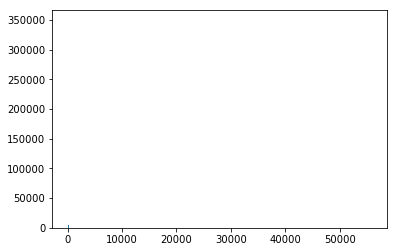

In [31]:
fig, ax = plt.subplots()
ax.hist(merged_data['time_diff'], bins=1000)
plt.show()

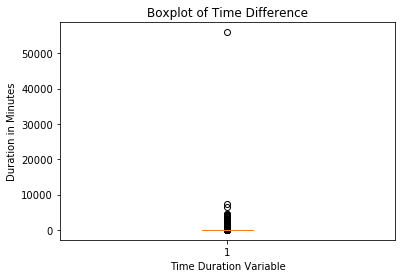

In [32]:
fig, ax = plt.subplots()
ax.boxplot(merged_data['time_diff'])
ax.set_title('Boxplot of Time Difference')
ax.set_ylabel('Duration in Minutes')
ax.set_xlabel('Time Duration Variable')
plt.show()

In [33]:
print(len(merged_data[merged_data['time_diff'] <= 0]))
merged_data = merged_data[merged_data['time_diff'] > 0]

19


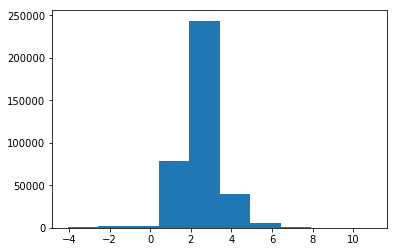

In [34]:
log = np.log(merged_data['time_diff'])

plt.hist(log)
plt.show()

In [35]:
merged_data.to_csv('bikeshare_q2.csv')